In [105]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [48]:
df = pd.read_csv('/Users/mac/Desktop/Programming_Stuff/Machine Learning/Datasets/tested.csv')

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [51]:
df.drop(['Name','Ticket','Cabin','Embarked'], axis=1 , inplace=True)

In [52]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [62]:
df_encoded = pd.get_dummies(df,columns=['Sex']).astype(int)

In [63]:
df_encoded.dropna(axis=1, inplace=True)


In [64]:
nan_perc=df_encoded.isnull().mean() * 100       

In [65]:
nan_perc

PassengerId    0.0
Survived       0.0
Pclass         0.0
SibSp          0.0
Parch          0.0
Sex_female     0.0
Sex_male       0.0
dtype: float64

In [67]:
df_encoded['Sex_female'] = df_encoded['Sex_female'].astype(int)

In [68]:
df_encoded

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,892,0,3,0,0,0,1
1,893,1,3,1,0,1,0
2,894,0,2,0,0,0,1
3,895,0,3,0,0,0,1
4,896,1,3,1,1,1,0
...,...,...,...,...,...,...,...
413,1305,0,3,0,0,0,1
414,1306,1,1,0,0,1,0
415,1307,0,3,0,0,0,1
416,1308,0,3,0,0,0,1


<Axes: >

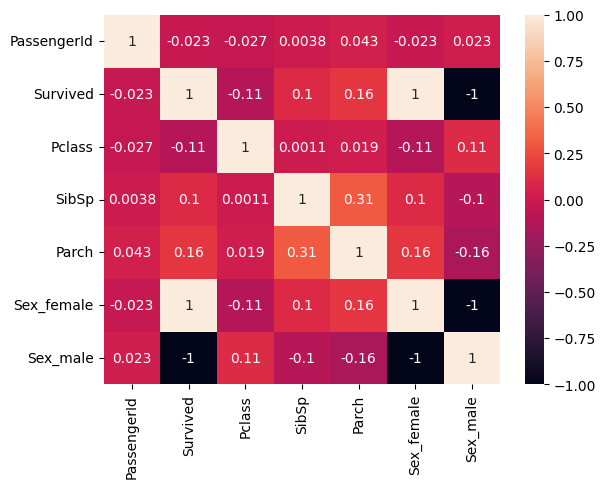

In [69]:
sns.heatmap(df_encoded.corr(), annot=True)

In [71]:
df_encoded.drop(['PassengerId'], axis=1, inplace=True)

In [72]:
df_encoded

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male
0,0,3,0,0,0,1
1,1,3,1,0,1,0
2,0,2,0,0,0,1
3,0,3,0,0,0,1
4,1,3,1,1,1,0
...,...,...,...,...,...,...
413,0,3,0,0,0,1
414,1,1,0,0,1,0
415,0,3,0,0,0,1
416,0,3,0,0,0,1


In [73]:
X=df_encoded.drop(['Survived'], axis=1)
Y= df_encoded['Survived']

In [75]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)

StandardScaler()

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [87]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [89]:
df=pd.DataFrame({'Actual':ytest,'Predicted':model.predict(xtest)})

In [97]:
ypred=model.predict(xtest)

In [103]:
print(f"xtest shape: {xtest.shape}")
print(f"ytest shape: {ytest.shape}")
print(f"ypred shape: {ypred.shape}")


xtest shape: (84, 5)
ytest shape: (84,)
ypred shape: (84,)


In [106]:
print('Mean absolute error is',mean_absolute_error(ytest,ypred))
print('Mean squared error is',r2_score(ytest,ypred))
print('Root mean squared error is',np.sqrt(mean_squared_error(ytest,ypred)))
print('Accuarcy is ',accuracy_score(ytest,ypred))

Mean absolute error is 0.0
Mean squared error is 1.0
Root mean squared error is 0.0
Accuarcy is  1.0
